# Bike Sharing Assignment

### Objective
#### 1. Which variables in the given data set are significantly related to demand for shared bikes.
#### 2. The degree or coefficient by which those variables are related.

# STEP 1 : Importing important libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# STEP 2 : Reading and understanding the given data.

In [2]:
bsd = pd.read_csv('day.csv')
bsd.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# checking the shape of given data
bsd.shape

(730, 16)

In [4]:
# checking the basic information like data types and if there are any null values
bsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Here we can check that there are no null values and data types of all the variables are either float or integer.

In [5]:
# Checking basic statistical information of given data
bsd.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Here we can check that there are no null values in any of the columns. There are 730 rows in each column and total there are 16 columns including the target variable.

# STEP 3 : Cleaning data

1. From the data dictionary we can check that "instant" is just a row index. So, we can drop this column.
2. "casual" is the count of casual users and "registered" is the count of registred users which are already included in "cnt" which is count of total rental bikes including both casual and registered. So, we can drop "casual" and "registered".

In [6]:
# dropping 'instant','casual', 'registered' columns
bsd.drop(['instant','casual', 'registered'], axis = 1, inplace = True)

In [7]:
bsd.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Here we can check that there is a column named 'dteday' this is date for which the data was recorded. Also there are other 3 columns "yr", "month" and "weekday" which show the same information separately we are more useful. However the "dteday" can be used to check number of days  the bussiness has completed. So, we can introduce a new column "bizz_days" which tells us the number of days the business has completed which can be calcuated from the date mentioned in "dteday" column.

In [8]:
bsd['bizz_days'] = (pd.to_datetime(bsd['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

Now, we can remove "dteday" column which is of no use

In [9]:
# dropping "dteday" column
bsd.drop(["dteday"], axis = 1, inplace = True)

In [10]:
bsd.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,bizz_days
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


Lets check the number of unique values in each column

In [11]:
bsd.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
bizz_days     730
dtype: int64

Here we can check that "season", "yr", "mnth", "holiday", "weekday", "workingday" and "weathersit" are all categorical variables hence have less number of unique values. Other variables are independent variables with continuous values and hence maby unique values.

The categorical values have entries in the form of integers, there is no meaning to keep them in ingteger format as they are un ordered categorical values. So, lets change those values to the values as given in data dictionary.

In [12]:
# changing the categorical values from integers to as given in the data dictionary
bsd.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bsd.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bsd.mnth = bsd.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bsd.weekday = bsd.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bsd.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,bizz_days
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


### Checking Outliers

Now lets check how the values are distributed for the continuous variables like : 'temp', 'atemp', 'hum', 'windspeed' in the given data set using box plots.

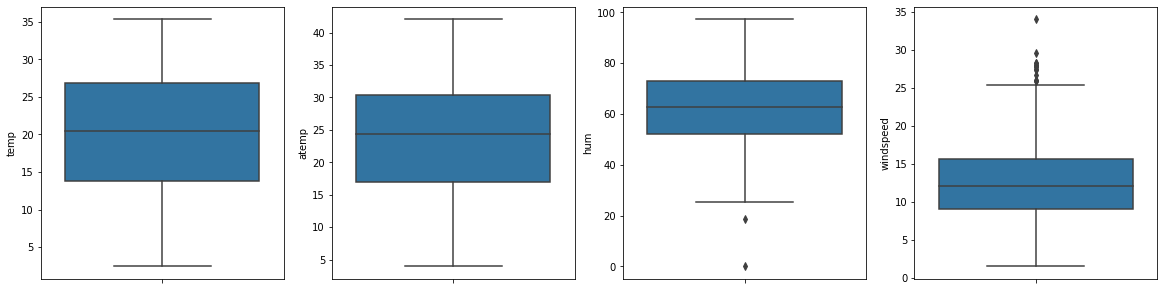

In [13]:
columns = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,5))

i = 1
for c in columns:
    plt.subplot(1,4,i)
    sns.boxplot(y=c, data=bsd)
    i+=1

 Here we can check that "temp" and "atemp" do not have any outliers. "hum" have some outliers which are at lower end, which is no point to bother as the humidity can be around 0 some days. Similarly in "windspeed" some outliers are at the higher end of the values which is completely normal as the wind speed can reach upto 35 on windy days.

#### Checking linear relationship between all the columns having numerical values using pairplots

<Figure size 1008x2016 with 0 Axes>

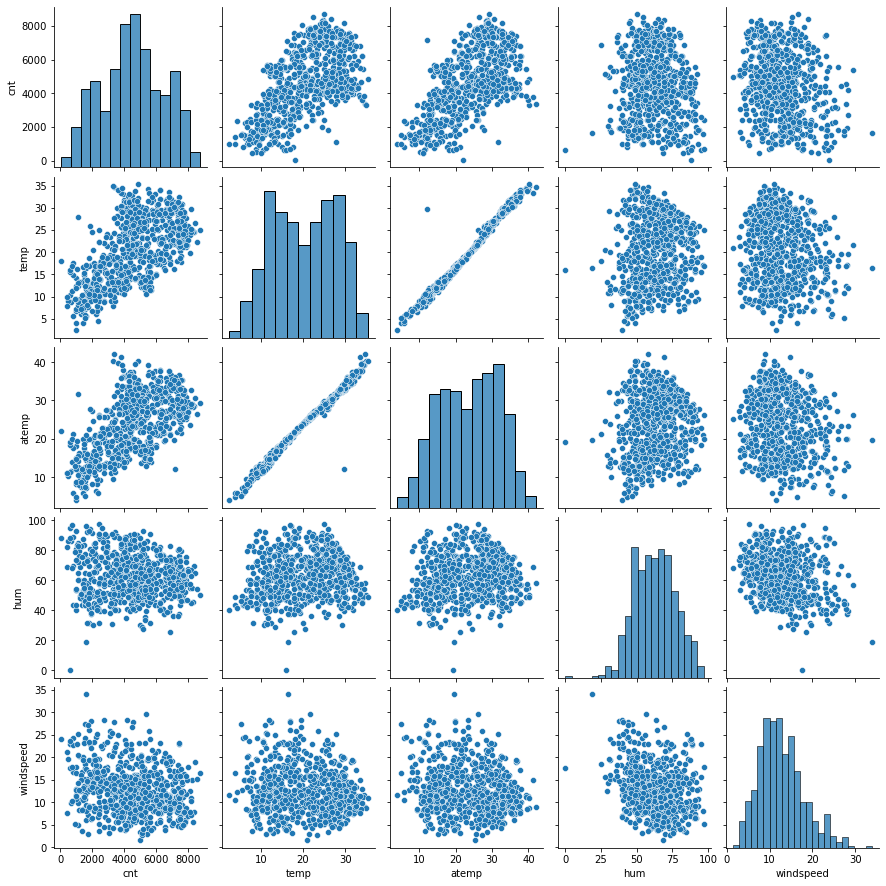

In [14]:
plt.figure(figsize = (14,28))
sns.pairplot(data=bsd,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

1. From the pair plots as plotted above we can check that "temp" and "atemp" have good linear relation ship with "cnt" which is number of rental bikes including both casual and registered and is our target variable.
2. Also we can check that temp and atemp are highly linearly co-related to each other which is mostly because atemp is just the feeling temperature. So, if the temperature increases, feeling temperature will definitely increase.

#### Lets plot a heatmap in order to check the relation between the continuous variables like : 'cnt', 'temp', 'atemp', 'hum' and 'windspeed'.

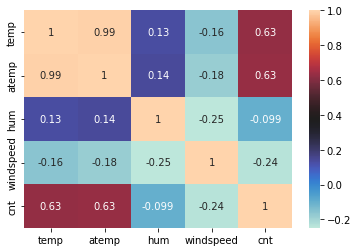

In [15]:
sns.heatmap(bsd[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='icefire', annot = True)
plt.show()

Now, lets check the co-relation between all the numerical variables in the given data set using heatmap.

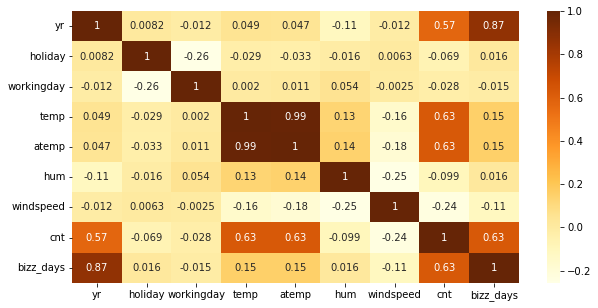

In [16]:
cor = bsd.corr()
plt.figure(figsize = (10,5))
sns.heatmap(cor, cmap="YlOrBr", annot = True)
plt.show()

Here we can check that target variable "cnt" is highly related to "bizz_days" which is the number of days business has completed. Also as we checked in the previous heatmap "cnt" is also linearly related to "temp" and "atemp" and also has pretty good relation to "yr". So, these are only the variables which can be used for model building.

### Now let's check how the categorical variables are related to the target variable.

Lest plot boxplot for all the categorical variables with target variable "cnt" in y axis and categorical variables in x axis.

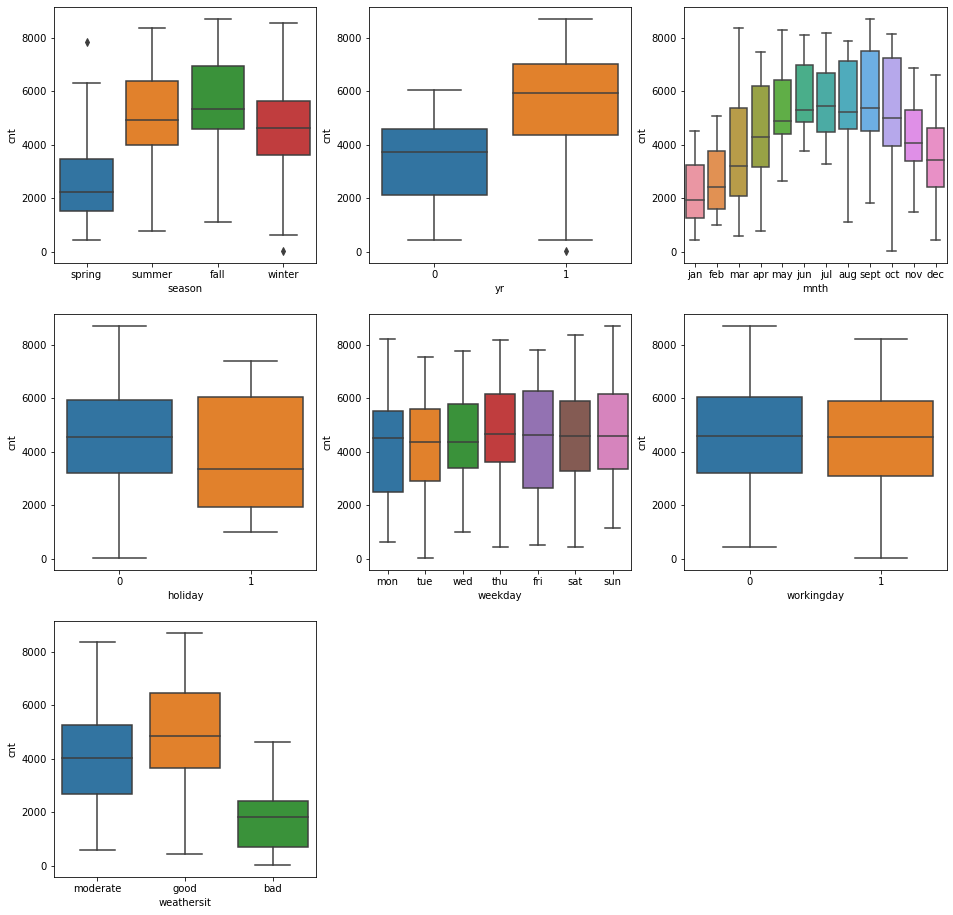

In [17]:
catg_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(16, 16))
for i in enumerate(catg_vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bsd, x=i[1], y='cnt')
plt.show()

#### Observations from boxplots with categorical variables

1. From the first plot with "season" variable we can check that the demand for rental bikes was highest in fall followed by summer.
2. From second plot we can check that the demand is higher in 2019 that 2018. So, demand increased the next year.
3. From the month plot we can check that demand is highest in June and September, followed by May, July and August and demand is lowest during the start of the year like in January and February.
4. From the fourth plot which is on holiday variable we can check that the demand is higher on non holiday as compared to holiday.
5. From the plot with week day as variable we can check that demand is higher on Thrusday and Sunday followed by Wednesday and Tuesday.
6. From plot with working day as variable it seems that there is no difference in demands if its a working or non-working day.
7. From the last plot with weathersit we can check that demand is higher higher in goot weather followed by moderate and its less in bad weather.

### Preparing the data for Linear Regression

Creating Dummy variables for categorical variables

In [18]:
bsd = pd.get_dummies(data=bsd,columns=["season","mnth","weekday"],drop_first=True)
bsd = pd.get_dummies(data=bsd,columns=["weathersit"])

We already know that (x-1) dummies can explain x categories. So, we can drop first column.

Let's check the names of columns as dummies have been created.

In [19]:
bsd.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'bizz_days', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [20]:
bsd.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,bizz_days,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


# STEP 4 : Model building

#### Splitting data into training and test

In [21]:
# Let's assume variable y contains target variable "cnt"
y = bsd.pop('cnt')

# And x contain all the other variables
X = bsd

# Lets split the data in 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Let's check the shape of train and test set for independent variables
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


#### Scaling all the continuous variables in same range using MinMaxScaler

In [23]:
# Importing important libraries required
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [24]:
# scaling continuous variables
n_vars = ['temp','atemp','hum','windspeed','bizz_days']

# Using Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform only the training set
X_train[n_vars] = scaler.fit_transform(X_train[n_vars])

In [25]:
# Let's check the data after scaling
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,bizz_days,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,1,0,0,0,0,1


In above data we can check that values in all the columns are in range from 0 to 1

In [26]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,bizz_days,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can check that the minimum value is 0 and maximum value is for all the columns. So, our data has been scaled successfully.

### First building a Model using RFE (Recursive Feature Elimination) Method and automation

In [27]:
# Building a Lienar Regression model using SKLearn for RFE
lrm = LinearRegression()
lrm.fit(X_train,y_train)

LinearRegression()

In [28]:
# Let's cut down number of features to 15 using automated approach
R = RFE(lrm,15)
R.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [29]:
# Let's check the columns selected by RFE and their weights
list(zip(X_train.columns,R.support_,R.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 14),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('bizz_days', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 7),
 ('mnth_jul', False, 12),
 ('mnth_jun', False, 5),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 3),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 16),
 ('weekday_sun', False, 15),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 9),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 6)]

## Eliminating the columns manually

In [30]:
# Let's define a function to build a model using statsmodel api
def ml_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lrm = sm.OLS(y_train, X_train_sm).fit()
    print(lrm.summary())
    return lrm

In [31]:
# defining a function to calculate VIFs and print them
# This function takes the columns for which VIF to be calculated as a parameter 
def cal_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [32]:
# Checking the names of the columns selected by RFE automation
X_train.columns[R.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'bizz_days',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [33]:
# checking the names of the columns not selected by RFE
X_train.columns[~R.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [34]:
# Let's take top 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]
# check the shape of X_train_rfe
X_train_rfe.shape

(511, 15)

## Model Building

## Model 1
#### Starting by selecting all the variables as selected by RFE

In [35]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

ml_model(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          1.70e-181
Time:                        21:21:08   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2809.2461    

#### Inference
Here we can check that the p-value of most of the coefficients are less than 0.05. However month_jan has p_value of 0.702 which is pretty high. So, we can drop this column for our next model. 

## Model 2

In [36]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
ml_model(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          1.35e-182
Time:                        21:21:09   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2792.2799    

#### Inference 
We can check that weekday_sat has value of 0.602. So, we can remove this column.

## Model 3

In [37]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
ml_model(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.9
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          1.10e-183
Time:                        21:21:09   Log-Likelihood:                -4135.1
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     497   BIC:                             8358.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2754.1903    

#### Inference
We can check that all the columns have p_values < 0.05. So, let's check for the VIF's in the next model.
We can check that hum has highest VIF of 27.69. So, we can drop this column.

## Model 4

In [38]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
ml_model(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     199.3
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          2.49e-181
Time:                        21:21:09   Log-Likelihood:                -4143.5
No. Observations:                 511   AIC:                             8313.
Df Residuals:                     498   BIC:                             8368.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1979.6907    

#### Inference
We can check that temp has a VIF of 6.80 which is pretty high. So, we can drop this column.

## Model 5

In [39]:
cols = ['yr', 'holiday', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
ml_model(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     146.1
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          3.19e-148
Time:                        21:21:09   Log-Likelihood:                -4224.7
No. Observations:                 511   AIC:                             8473.
Df Residuals:                     499   BIC:                             8524.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5219.2280    

#### Inference
In above model we can check that mnth_july has a p value of  0.814 which is pretty high. So, we can drop this column.

## Model 6

In [40]:
cols = ['yr', 'holiday', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
ml_model(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     161.1
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          2.52e-149
Time:                        21:21:09   Log-Likelihood:                -4224.7
No. Observations:                 511   AIC:                             8471.
Df Residuals:                     500   BIC:                             8518.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5238.8244    

#### Inference
We can check that season_summer has a p_value of 0.069 which is pretty high. So, we can drop this column in our next model.

## Model 7

In [41]:
cols = ['yr', 'holiday', 'workingday', 'windspeed', 'season_spring', 'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
ml_model(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     177.8
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          9.56e-150
Time:                        21:21:09   Log-Likelihood:                -4226.4
No. Observations:                 511   AIC:                             8473.
Df Residuals:                     501   BIC:                             8515.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5145.8790    

#### Checking if variables are independent  to each other
Ploting heat map to check if any of the independent variables are related to each other. Because the assumption of linear regression mentions that the independent variables must not be related to each other.

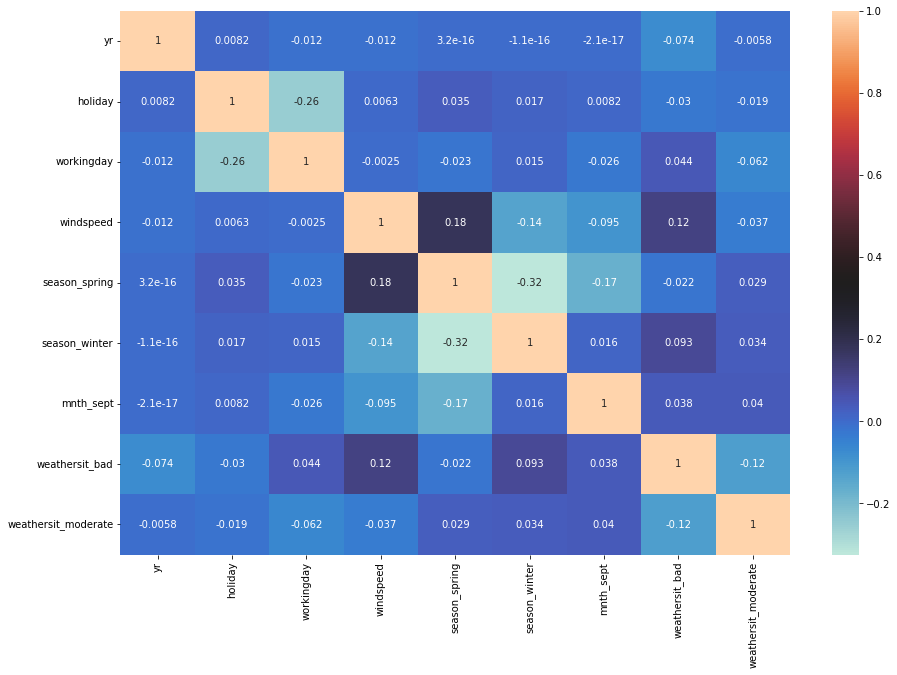

In [42]:
# Checking correlation of features selected by Recursive feature elimination with target column using heat map.
plt.figure(figsize = (15,10))
sns.heatmap(bsd[['yr', 'holiday', 'workingday', 'windspeed', 'season_spring', 'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='icefire', annot=True)
plt.show()

We can check that Holiday is highly related to working_day. So, removing holiday.

## Model 8

In [43]:
cols = ['yr', 'workingday', 'windspeed', 'season_spring', 'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
ml_model(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     194.3
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          2.21e-148
Time:                        21:21:12   Log-Likelihood:                -4232.4
No. Observations:                 511   AIC:                             8483.
Df Residuals:                     502   BIC:                             8521.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5059.6407    

Here we can check that the p value of working_day has increased to 0.127. So, removing this value.

## Model 9

In [44]:
cols = ['yr', 'windspeed', 'season_spring', 'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
ml_model(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          4.57e-149
Time:                        21:21:12   Log-Likelihood:                -4233.5
No. Observations:                 511   AIC:                             8483.
Df Residuals:                     503   BIC:                             8517.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4957.7301    

Earlier we checked that temp has higher co relation with the target variable. So, lets add temp variable and check if it increased R and R2.

## Model 10

In [45]:
cols = ['yr', 'windspeed', 'season_spring', 'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate', "temp"]
ml_model(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     276.0
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          2.38e-178
Time:                        21:21:12   Log-Likelihood:                -4161.9
No. Observations:                 511   AIC:                             8342.
Df Residuals:                     502   BIC:                             8380.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2343.7462    

#### Inference
In above model we can check that we go R value of 8.15 and R2 value of 8.12. These are pretty good. Also p_values of all the variables are almost 0.00 and highest VIF value is 4.18 which is pretty acceptable. So, any of the variables cannot be removed further from variables list. Let's select Model 10 as our final model.

In [46]:
# Building a model with all the selected features
def sklrn_model_build(X,y):
    lr = LinearRegression()
    lr.fit(X,y)
    return lr

In [47]:
cols = ['yr', 'windspeed', 'season_spring', 'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate', "temp"]

# building model with above selected columns
lr = sklrn_model_build(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

2343.7461532809975 [ 1996.45515571  -723.9817243  -1267.36114056   422.00421693
   544.43667218 -2190.13459837  -640.23668454  3438.73574418]


# STEP 5 : Model Evaluation

### Residual analysis

In [48]:
y_train_pred = lr.predict(X_train[cols])

In [49]:
# plotting a histogram of the error terms
def res_hist_plot(actual, predicted):
    sns.distplot(actual-predicted)
    plt.title('Histogram plot of Error Terms')
    plt.xlabel('Errors')

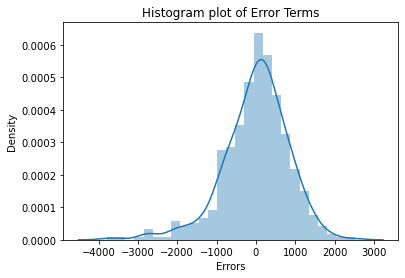

In [50]:
res_hist_plot(y_train, y_train_pred)

Here we can check that the error are normally distributed and mean seems to be at 0. So, there is no problem in our model.

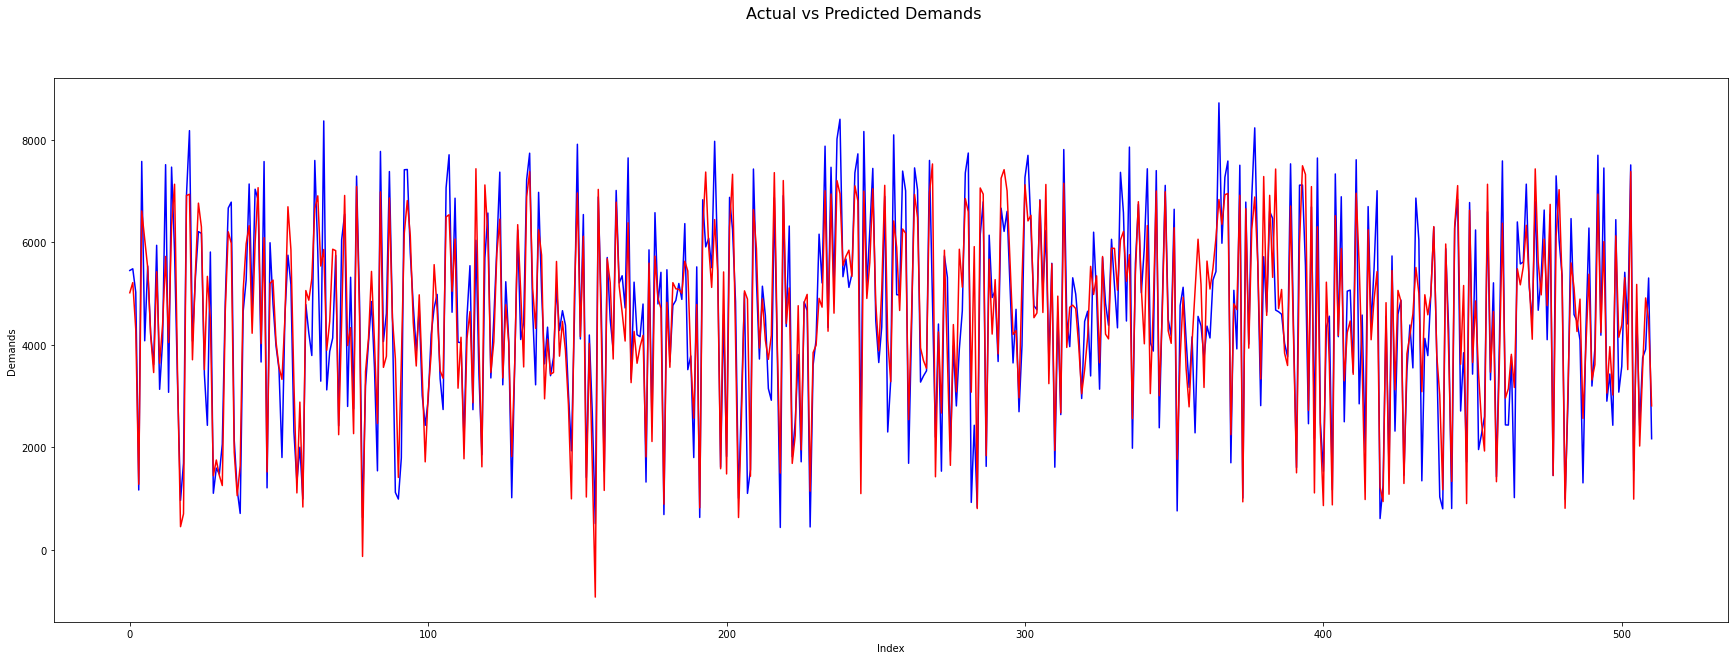

In [51]:
# Actual vs predicted
plt.figure(figsize = (30,10))
x = [i for i in range(0,len(X_train),1)]
plt.plot(x,y_train, color="blue")
plt.plot(x,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted Demands', fontsize = 16)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Both the actual and the predicted results similar and somewart overlapping pattern which indicates that our model is well.

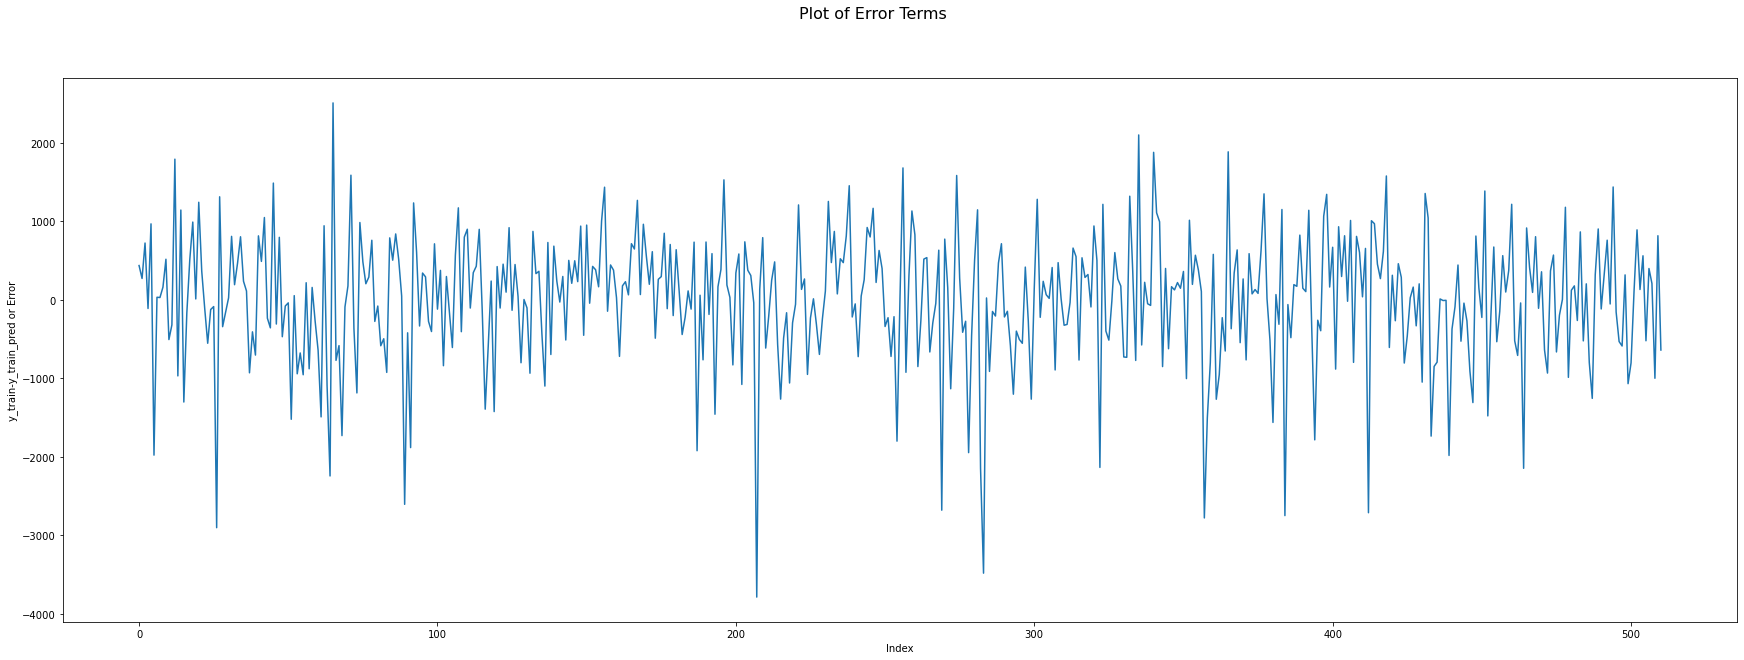

In [52]:
# plotting Error Terms
plt.figure(figsize = (30,10))
x = [i for i in range(0,len(X_train),1)]
plt.plot(x,y_train-y_train_pred)
plt.suptitle('Plot of Error Terms', fontsize = 16)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred or Error')
plt.show()

From above graph we can check that the error terms of randomly distributed and are independent of each other.

#### Linearity check 

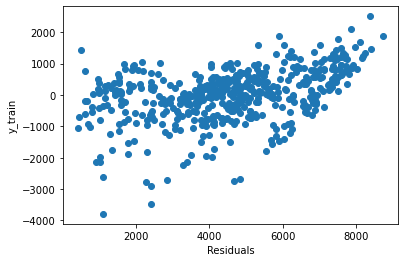

In [53]:
# plotting a scatter plot of residiuals to check the linearity
res = (y_train - y_train_pred)
plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("Residuals")
plt.show()

#### Predicting the values for test data set

In [55]:
# Scale variables in X_test
numerical_variables = ['temp','atemp','hum','windspeed','bizz_days']

# no fitting for the test data, only transform
X_test[numerical_variables] = scaler.transform(X_test[numerical_variables])

In [56]:
# selected columns from our final model
cols = ['yr', 'windspeed', 'season_spring', 'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate', "temp"]

# Predicting the values for test data
y_test_pred = lr.predict(X_test[cols])

#### Checking the R-squared values for test predeictions

In [57]:
# R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8147439964505088

Here we can check that the R2 value of the Test data set is 0.8147 which is approximately equal to 0.815 and the R2 value for the train data set is 0.815. So, both the values are same which is an indication that our model is permorming good even in our Tets data set.

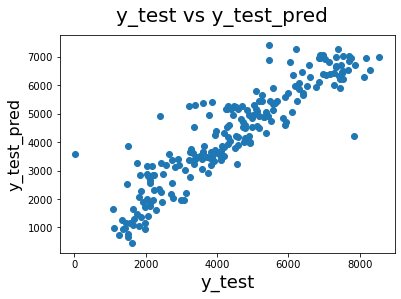

In [59]:
# Let's plot y_test and y_test_pred to understand the spread of values

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

#### Let's plot actual and predicted values of Test data set to check how good is our model.

In [60]:
# This function takes Actual and Predicted values as input, also lenght of data and data name and will plot gragh for values
def actual_predicted_plot(act,pred,length,dataname):
    x = [i for i in range(1,length,1)]
    fig = plt.figure(figsize=(20,6))
    plt.plot(x,act, color="blue", linewidth=2.0, linestyle="-")
    plt.plot(x,pred, color="red",  linewidth=2.0, linestyle="-")
    fig.suptitle('Actual vs Predicted - '+dataname, fontsize=20) 
    plt.xlabel('Index', fontsize=18)
    plt.ylabel('Counts', fontsize=16) 

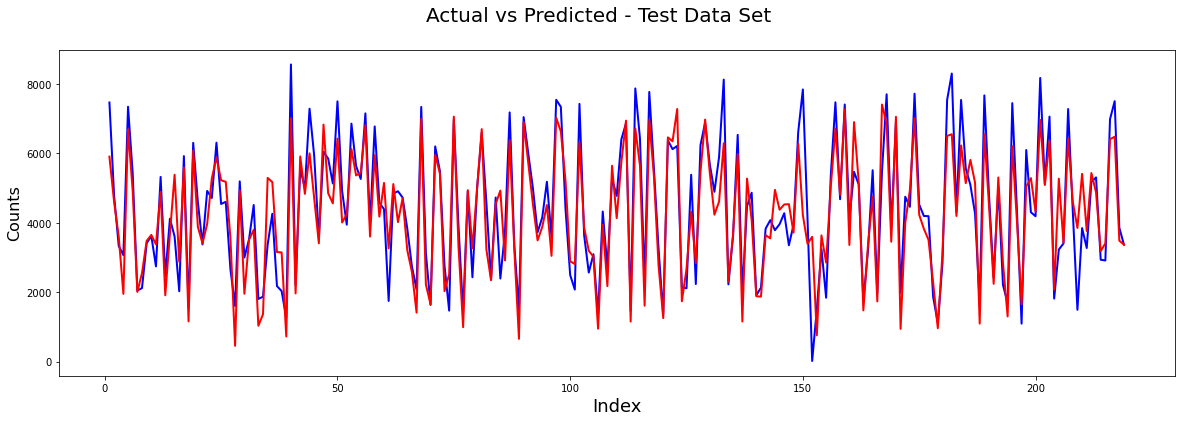

In [61]:
# Plotting Actual vs Predicted graph for Test Data
actual_predicted_plot(y_test,y_test_pred,len(y_test)+1,'Test Data Set')

From above graph we can check that the values of actual is similar or close to that of the predicted.  

#### Plotting the error terms for the test data set

In [63]:
# Error terms
def error_terms_plot(act,pred):
    x = [i for i in range(1,220,1)] # we know that number of rows in test data set is 219
    fig = plt.figure(figsize=(18,5))
    plt.plot(x,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20) 
    plt.xlabel('Index', fontsize=18)
    plt.ylabel('Error (Actual - Predicted)', fontsize=16)

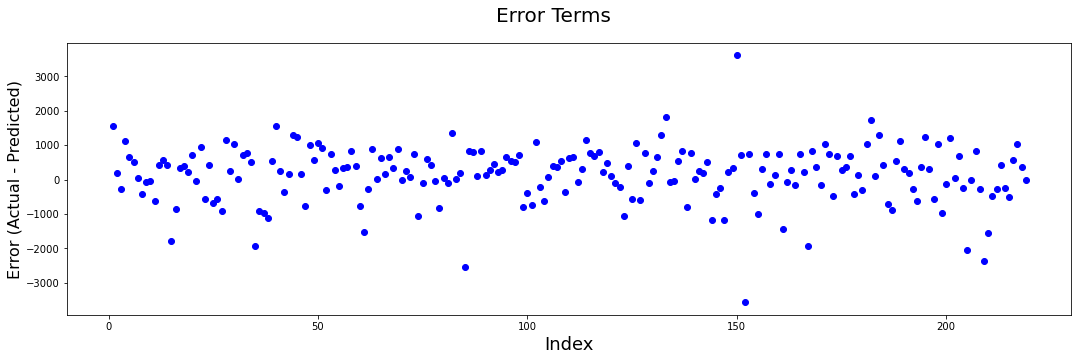

In [64]:
# plotting error terms for test data set
error_terms_plot(y_test,y_test_pred)

From the above graph we observe that the error terms which is (actual - predicted) are randomly distributed and there is no visible pattern. So, the output is well explained by the model and there are no other parameters that can explain model better.

# CONCLUSIONS

Let's derive important inferences from the our final modal which is Modal 10. As we have already tested the wellness and acuracy of the model.

In [65]:
cols = ['yr', 'windspeed', 'season_spring', 'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate', "temp"]
ml_model(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     276.0
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          2.38e-178
Time:                        23:45:29   Log-Likelihood:                -4161.9
No. Observations:                 511   AIC:                             8342.
Df Residuals:                     502   BIC:                             8380.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2343.7462    

### Below are the conclusions
1. Here we can check that windspeed has a negative coefficient which means company should expand their business when wind speed is relatively less.
2. We can check that month September and Winter season have high positive coefficients which means.
3. Weathersit_bad has high negative coefficient which means if the weather is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog company shoudl refrain from expanding their business during there season.
4. yr variable has high positive coefficient which means the business will definitely give positive result once the situation gets normal.
